In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
import plotly.graph_objects as go
import plotly.express as px

In [56]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [57]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [58]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/CO2flux/CO2flux_Baseline_2.6_cropped.nc')
data_baseline = xr.open_dataset(dataset)

In [59]:
dataset_oae = (r'/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/CO2flux/CO2flux_OAE_2.6_cropped.nc')
data_oae = xr.open_dataset(dataset_oae)

### EU Average of CO2 flux

In [60]:
data_baseline = data_baseline.co2flux[0,:]
data_oae = data_oae.co2flux[0,:]

In [61]:
data_baseline = data_baseline.to_dataset(name='co2flux')
data_oae = data_oae.to_dataset(name='co2flux')

In [62]:
data_baseline = data_baseline.co2flux * 31536000 # kg/m2/yr CO2
data_oae = data_oae.co2flux * 31536000 # kg/m2/yr CO2

In [63]:
data_baseline = data_baseline / 0.04401 # mol/m2/yr CO2
data_oae = data_oae / 0.04401 # mol/m2/yr CO2

In [64]:
dataframe_base = data_baseline.sel(time_counter=slice('2090', '2100'))

In [65]:
dataframe_oae = data_oae.sel(time_counter=slice('2090', '2100'))

### Averaged Annual Amplitude of CO2 flux for the last ten years without OAE

In [107]:
co2flux_max_base = dataframe_base.resample(time_counter='AS').max('time_counter')

In [108]:
co2flux_min_base = dataframe_base.resample(time_counter='AS').min('time_counter')

In [109]:
co2flux_max_base = co2flux_max_base.to_dataset(name='co2flux')
co2flux_min_base = co2flux_min_base.to_dataset(name='co2flux')

In [110]:
co2flux_amplitude_base = co2flux_max_base['co2flux'] - co2flux_min_base['co2flux']

In [111]:
co2flux_amplitude_base = co2flux_amplitude_base.to_dataset(name='co2flux')

In [112]:
co2flux_amplitude_base_map = co2flux_amplitude_base.co2flux.mean(dim=('time_counter'))

In [113]:
co2flux_amplitude_base_map = co2flux_amplitude_base_map.to_dataset(name='co2flux')

Text(0.5, 1.06, 'CO2 flux seasonal cycle change without OAE')

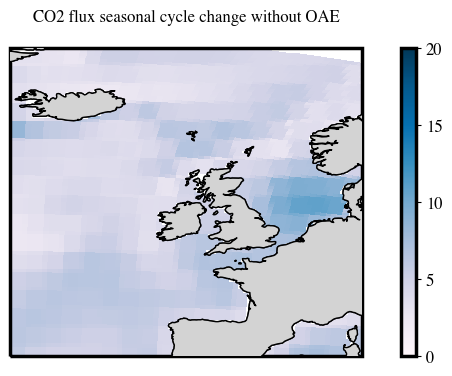

In [114]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im = co2flux_amplitude_base_map.co2flux.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 20, cmap="PuBu"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('CO2 flux seasonal cycle change without OAE', fontname="Times", fontsize=12, y=1.06)

### Averaged Annual Amplitude of CO2 flux for the last ten years with OAE

In [115]:
co2flux_max_oae = dataframe_oae.resample(time_counter='AS').max('time_counter')

In [116]:
co2flux_min_oae = dataframe_oae.resample(time_counter='AS').min('time_counter')

In [117]:
co2flux_max_oae = co2flux_max_oae.to_dataset(name='co2flux')
co2flux_min_oae = co2flux_min_oae.to_dataset(name='co2flux')

In [118]:
co2flux_amplitude_oae = co2flux_max_oae['co2flux'] - co2flux_min_oae['co2flux']

In [119]:
co2flux_amplitude_oae = co2flux_amplitude_oae.to_dataset(name='co2flux')

In [120]:
co2flux_amplitude_oae_map = co2flux_amplitude_oae.co2flux.mean(dim=('time_counter'))

In [121]:
co2flux_amplitude_oae_map = co2flux_amplitude_oae_map.to_dataset(name='co2flux')

Text(0.5, 1.06, 'CO2 flux seasonal cycle change with OAE')

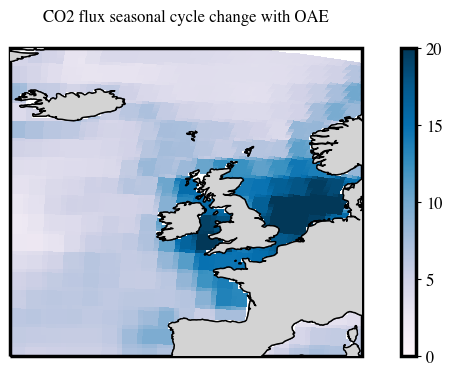

In [122]:
fig = plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im = co2flux_amplitude_oae_map.co2flux.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 20, cmap="PuBu", 
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('CO2 flux seasonal cycle change with OAE', fontname="Times", fontsize=12, y=1.06)

### Δ CO2 flux between Baseline and OAE scenario

In [126]:
co2flux_amplitude_change = co2flux_amplitude_oae - co2flux_amplitude_base

In [127]:
co2flux_amplitude_change_map = co2flux_amplitude_change.co2flux.mean(dim=('time_counter'))

In [128]:
co2flux_amplitude_change_map = co2flux_amplitude_change_map.to_dataset()

Text(0.5, 1.06, 'CO2 flux seasonal cycle difference between with and without OAE')

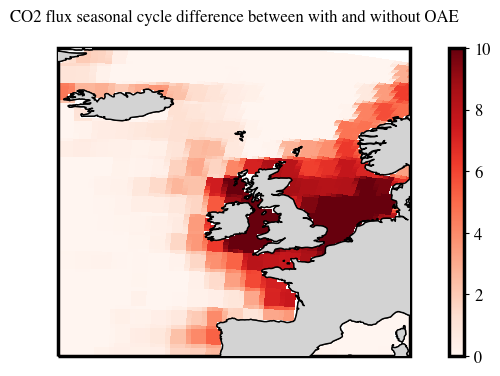

In [129]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im = co2flux_amplitude_change_map.co2flux.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 10, cmap="Reds"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('CO2 flux seasonal cycle difference between with and without OAE', fontname="Times", fontsize=12, y=1.06)

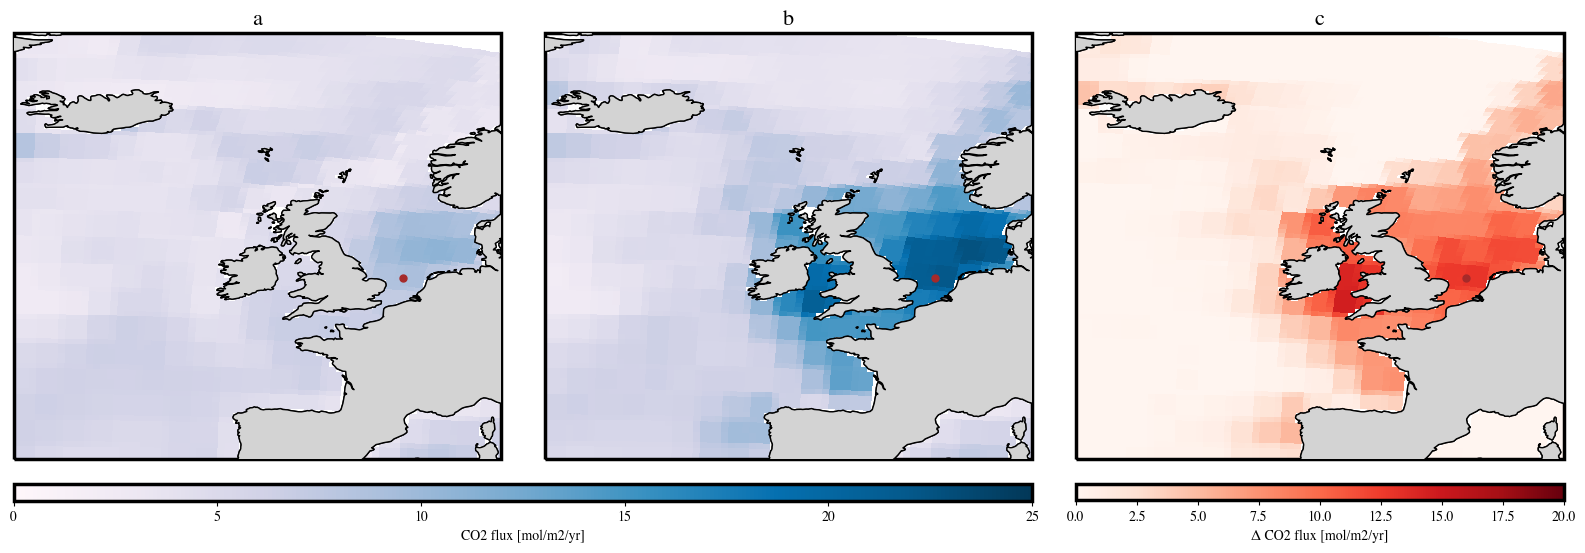

In [130]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 8))
plt.subplots_adjust(wspace=0.09, hspace=0.05)

im1 = co2flux_amplitude_base_map.co2flux.plot.pcolormesh(
        ax=ax1, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=25,
        cmap="PuBu",
        add_colorbar=False
    )
    
im2 = co2flux_amplitude_oae_map.co2flux.plot.pcolormesh(
        ax=ax2, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=25,
        cmap="PuBu",
        add_colorbar=False
    )
    
im3 = co2flux_amplitude_change_map.co2flux.plot.pcolormesh( 
        ax=ax3, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=20,
        cmap="Reds", 
        add_colorbar=False
    )

ax1.set_title("a", fontsize=16, y=1)
ax2.set_title("b", fontsize=16, y=1)
ax3.set_title("c", fontsize=16, y=1)    
    
ax1.coastlines()
ax1.set_extent([-25, 10, 40, 70])  
ax1.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

ax2.coastlines()
ax2.set_extent([-25, 10, 40, 70]) 
ax2.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

ax3.coastlines()
ax3.set_extent([-25, 10, 40, 70])
ax3.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

cbar = plt.colorbar(im1, ax = [ax1, ax2], aspect = 60, pad=0.04, location='bottom')
cbar.set_label('CO2 flux [mol/m2/yr]', fontsize=10)

cb3 = plt.colorbar(im3, ax=ax3, aspect = 30, pad=0.04, location='bottom')
cb3.set_label('Δ CO2 flux [mol/m2/yr]', fontsize=10)
cb3.ax.yaxis.get_offset_text().set(size=10)

pass

ax1.plot(3, 53, "o", color='brown', markersize=5)
ax2.plot(3, 53, "o", color='brown', markersize=5)
ax3.plot(3, 53, "o", color='brown', markersize=5)

font_size = 10
cb3.ax.tick_params(labelsize=font_size)
cbar.ax.tick_params(labelsize=font_size)

#fig.suptitle('Seasonal Cycle Amplitude of CO2 flux (average over the last decade)', fontname='Times', fontsize=15, y=0.81)
plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/CO2flux/figs/co2flux_seasonal_cycle.png')

### Amplitude at Location Point

In [131]:
co2flux_base_sliced = dataframe_base.where((3 < dataframe_base.nav_lon) & (dataframe_base.nav_lon < 3.1) & (52 < dataframe_base.nav_lat) & (dataframe_base.nav_lat < 53), drop=True)
co2flux_oae_sliced = dataframe_oae.where((3 < dataframe_oae.nav_lon) & (dataframe_oae.nav_lon < 3.1) & (52 < dataframe_oae.nav_lat) & (dataframe_oae.nav_lat < 53), drop=True)

In [132]:
co2flux_max_base_slc = co2flux_base_sliced.resample(time_counter='AS').max('time_counter')

In [133]:
co2flux_min_base_slc = co2flux_base_sliced.resample(time_counter='AS').min('time_counter')

In [134]:
co2flux_max_base_slc = co2flux_max_base_slc.to_dataset(name='co2flux')
co2flux_min_base_slc = co2flux_min_base_slc.to_dataset(name='co2flux')

In [135]:
co2flux_amplitude_base_slc = co2flux_max_base_slc['co2flux'] - co2flux_min_base_slc['co2flux']

In [136]:
co2flux_amplitude_base_slc = co2flux_amplitude_base_slc.to_dataset(name='co2flux')

In [137]:
co2flux_max_base_slc = co2flux_max_base_slc.co2flux.mean(dim=('time_counter'))
co2flux_min_base_slc = co2flux_min_base_slc.co2flux.mean(dim=('time_counter'))
co2flux_amplitude_base_slc = co2flux_amplitude_base_slc.co2flux.mean(dim=('time_counter'))

In [138]:
co2flux_max_oae_slc = co2flux_oae_sliced.resample(time_counter='AS').max('time_counter')

In [139]:
co2flux_min_oae_slc = co2flux_oae_sliced.resample(time_counter='AS').min('time_counter')

In [140]:
co2flux_max_oae_slc = co2flux_max_oae_slc.to_dataset(name='co2flux')
co2flux_min_oae_slc = co2flux_min_oae_slc.to_dataset(name='co2flux')

In [141]:
co2flux_amplitude_oae_slc = co2flux_max_oae_slc['co2flux'] - co2flux_min_oae_slc['co2flux']

In [142]:
co2flux_amplitude_oae_slc = co2flux_amplitude_oae_slc.to_dataset(name='co2flux')

In [143]:
co2flux_max_oae_slc = co2flux_max_oae_slc.co2flux.mean(dim=('time_counter'))
co2flux_min_oae_slc = co2flux_min_oae_slc.co2flux.mean(dim=('time_counter'))
co2flux_amplitude_oae_slc = co2flux_amplitude_oae_slc.co2flux.mean(dim=('time_counter'))